<a href="https://colab.research.google.com/github/AashiDutt/Pytorch/blob/master/Convolutional_Neural_Network_in_pytorch(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Deep Neural Network have two restrictions

1.When number of inputs increase as in case of a RGB image having 72 X 72 pixels multiplied by 3( for 3 layer pixels ) = 15552 inputs then computation becomes difficult.

2.Another drawback of using regular Neural Networks was over fitting which occurs when a model tailor

is itself a very closely to the data that it has been trained on reducing its ability to pinpoint generalized

features of test data sets that it hasn't seen before .


### SOLUTION : 

Using Convolutional Neural Network we can make use of ''Pooling Layers'' which act continuously to reduce number of parameters(inputs to neural N/w) 



**Layers of CNN**

1.Convolutional layers
2.Pooling Layers
3.Fully Connected Layers


In between the input and output layers we have a series of convolution and pooling operations followed by the fully connected layers.

**Primary goal of Convolutional Layer ** is to extract and learn specific image features that can help in classifying the image.

each input to convolutional layer are processed by a convolutional filter called **Kernel Matrix** inside convolutional layer to perform kernel convolution.

Kernel Convolution - slide a kernel martix over the image.

the amount by which kernel moves over an image is called a Stride .eg if stride =1 , the kernel moves 1 pixel at a time. The area where the operation takes place is called the receptive field whose dimensions = size of the kernel (eg 3X3 )

Kernel operation= multiply each no. of resceptive field with corresponding no. in the kernel. 

example 

**STEP 1** : Receptive field(inputs) = 

100   100  255

100   100  255

100   100  255

**STEP 2** : Kernel(filter) Matrix =

0   -1    0

-1   5    -1

0    -1    0

**STEP 3**:  Multiply =(100*0) +(100*-1) +(255*0)+(100*-1)+(100*5) +(255*-1)+ (100*0) +(100 *-1)+(255*0)

=-55

**STEP 4:**  taking average = sum/no. of elements of kernel
 = -55/9 = -6.1
 
**STEP 5**:   place the average in** feature map ** used to extract and learn specific image features to help classify image  and shift by Stride to cover entire image


**Feature map contains  specific feature of interest which was extracted from orignal image.**

**Kernel is a Feature** **detector**.
Each kernel has distinctive set of weights.

Kernel learns weight during training by gradient descent algorithm.

different filters are able to detect different features from an image ,more filters we have , more features we can extract from an image

when dealing with 3D image , the kernel should also be 3 dimensional.(DEPTH OF KERNEL MUST MATCH DEPTH OF THE IMAGE)


**WORKING ON RGB IMAGE**

an  R.G.B. image 72 X72 corresponding to roughly 5000 pixels.

And again since we're dealing with three channel colored image we're each pixel corresponds to three
pixel intensities resulting in roughly fifteen thousand input nodes.(72 x 72 x3 =15,552)

And as such each node in the hidden layer would contain fifteen thousand whites roughly fifteen thousand.

If we were to add even more nodes in the hidden layer then there just wouldn't be sufficient computational power to run the neural network since each node and that hidden layer is parameter rise by roughly fifteen thousand inmates.

The more we add the more weights the more parameters that need to be updated during the training process whereas with convolution all neural networks every note in the hidden layer is only connected to a smaller region of the input volume.

[To put this into perspective if we had the same exact image with a kernel and a corresponding 3X3 a receptive field this makes for nine weights and to account for the depth of the volume since

this would be a three channel colored image the nine by three would correspond to each kernel only having a total of twenty seven weights each.]

example: 

receptive field = 3X3 = kernel size 
=> 9 elements input = 9 weights 
for 3 channels (depth) => total weights = 9*3 =27
(weight for each node at hidden layer)

**STEP 6**:  After getting feature map ,apply Relu Activation function for FILTERING

Q:  Why apply relu ?
 to overcome problem of **vanishing gradient**
 (returns gradient value =0 if input is -tive and if input is +tive then returns the same value as output)
 converts all negative values in image to zero.
 
** vanishing gradient** - decreased feed forward gradient within deep neural network.
 
 if gradient is too small or vanishes then network cannot make use of gradient descent to update weights quickly, i.e learning slows down.
 
Q: why not use sigmoid function - because its derivative becomes zero at tails

**STEP 7** : POOLING

the pooling layer acts to shrink the image stack by reducing the dimensionality of the representation of each feature map thereby

also reducing the computational complexity of the model although it retains the most important information

such that our a feature of interest is still consistent with its feature map.

# Pooling operations-

sum , average , max pooling

max_pooling - reports max. output within a rectangular neighbourhood.

take a kernel of dimension 2X2 and move it through out the image such that it takes only the max value in the neighbourhood(stride = 2)

- scales down the feature map size to only accountable max values


**why pooling -**

reduces computational cost

reduces the chances of overfitting by providing abrstracted form of orignal feature map.

but still maintains major features


** we can have multiple convolutional and pooling layers**

 ** the more deeper we go the more unrecognizable feature maps become**


# Visualising working of CNN 

http://scs.ryerson.ca/~aharley/vis/conv/


**STEP 8**: FULLY CONNECTED LAYERS (multi layer perceptron which updates its weights and biases to minimize total error function using gradient descent)

1.flattern the feature maps into 1D array of pixels before feeding them to the input layer of fully connected layer where each pixel corresponds to a node in the input layer.

2.The fully connected neural network is responsible in taking these flatterned features as inputs processing them
to obtain a final probability as to what class the image belongs to. 

[therefore we can say that 1st part of convolution is in charge of feature extraction  while 2nd part is incharge of classification. ]


3.if the prediction is wrong then we use cross entropy to calculate the error and correct it by updating weights and bias values(using gradient descent) for all filters in the CNN network using Backpropagation.


## PADDING
 
 adding extra border to the image in order to preserve the image size after kernel convolution.
 



In [0]:
# CODE

# Loading Images and Transforms

!pip3 install torch torchvision

In [0]:
import torch
from torchvision import datasets, transforms

# transformations are used to preprocess the dataset before it is fed to neural network
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# making use of Colab GPU using Cuda
# Runtime -->Change runtime type--> Hardware --> GPU

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [0]:
transform = transforms.Compose([transforms.Resize((28,28)),transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
#Compose allows us to chain together transformations

#we chose value 0.5 because we want values in range 0 to 1,creating a range (-1 to 1)

# Normalizing the image 
# formula z = (x - mean)/ standard deviation
# eg. (min value - mean)/standard deviation = (0-0.5)/0.5 = -1
# (max value- mean)/sd = (1-0.5)/0.5 =1  therefore range = (-1,1)

#Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)) = Normalize(mean,standard deviation)
#Normalize the value of each tensor of image size channel height and widthin 1st set of brackets
#converts numpy array(of range 0-255) to tensor (a float tensor in range 0 to 1)

# defining root directory of training_dataset
training_dataset = datasets.MNIST(root ='./data', train = True, download = True,transform =transform )
validation_dataset = datasets.MNIST(root ='./data', train = False, download = True,transform =transform )
print("Length: ", len(validation_dataset.test_data))

training_loader = torch.utils.data.DataLoader(dataset = training_dataset, batch_size = 100, shuffle = True)
validation_loader =torch.utils.data.DataLoader(dataset = training_dataset, batch_size = 100, shuffle = False)

Length:  10000


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


In [0]:
# to plot an image convert it again to a numpy array
def im_convert(tensor):
  image = tensor.cpu().clone().detach().numpy()
  # clone to create new copy of tensor
  # use detach function to call numpy
  
  image = image.transpose(1,2,0)
  # we have shape of tensor as(1,28,28)(single colorchannel,shape(28,28)) but to plot a grayscale image we need tensor of shape (28,28,1)
  # we swap axis using transpose means swap axis 0 for axis 1, axis 1 fo axis 2 and axis 0 in the end
  #print(image.shape)
  # denormalizing the image
  # x=z * standard deviation + mean
  
  image = image *np.array((0.5,0.5,0.5)) + np.array((0.5,0.5,0.5))
  image = image.clip(0,1)
  # to reconvert range from (-1,1) to (1,1) we use clip function
  return image


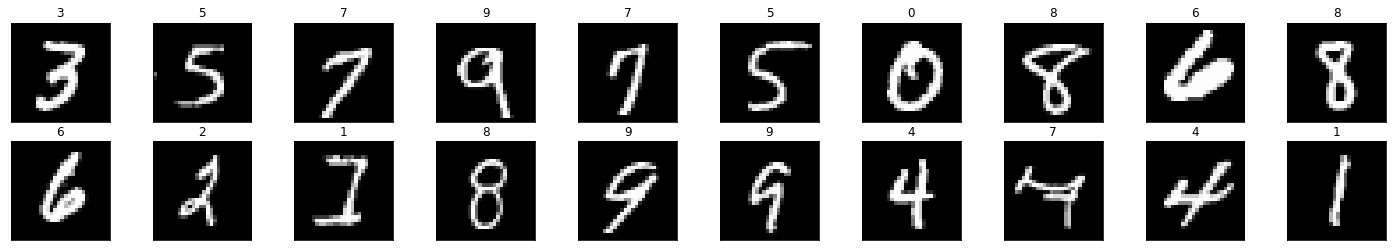

In [0]:
# creating a iterator 
# iter creates an object that allows us to go through the iterable of training loader one element at a time 
dataiter = iter(training_loader)
images , labels = dataiter.next()
#images, labels = dataiter.next() # gets first batch of training data
fig = plt.figure(figsize =(25,4))

for idx in np.arange(20):
  ax =fig.add_subplot(2,10,idx+1,xticks =[],yticks =[])   # 2 rows 10 columns per row and index
  plt.imshow(im_convert(images[idx]))
  ax.set_title(labels[idx].item())

In [0]:
class LeNet(nn.Module): # classifying layer by layer
  def __init__(self):
    super().__init__()
    
    # Defining Convolutional Layers
    self.conv1= nn.Conv2d(1, 20, 5, 1)  # Layer 1       
    #Conv2d(no. of input channel(greyscale image),no. of outputchannel,kernel(filter)size,stride)
    
    self.conv2= nn.Conv2d(20, 50, 5, 1) # Layer 2   
    
    #Defining Fully Connected Layer
    # size of image = 28X28 --> conv1 size = 24 x24 --> pooling(2x2) size=12x12
    # -->conv2(5x5 kernel)  size = 8x8  --> pooling(2x2)  size = 4x4x(no. of output channels of preceesing layer)
    self.fc1 = nn.Linear(4*4*50,500)    # Linear(input nodes,no. of output nodes)
    
    self.dropout1 = nn.Dropout(0.5)     # dropout layer to decreas chances of overfitting
    
    self.fc2 = nn.Linear(500,10)        # Linear(inputnodes,outputnodes(mnist 0-9 classification))
    
  def forward(self,x):
    x = F.relu(self.conv1(x))      # activation function conv layer 1
    x = F.max_pool2d(x,2,2)        # pooling layer (input,size of kernel)
    
    x = F.relu(self.conv2(x))      # activation function conv layer 2
    x = F.max_pool2d(x,2,2) 
    
    x = x.view(-1,4*4*50)        # (no. of col,no. of rows) reshaping x to flattern it and input it to fully connected layers
    # -1 allows model to self assume no. of columns as long as no. of rows are satisfied
    
    x = F.relu(self.fc1(x))  # attach relu activation fun to 1st fully connected layer
    
    x = self.dropout1(x)      # adding dropout layer inbetwee two fully connected layers
    x = self.fc2(x)    # no relu here as we will use cross entropy for this later
    return x
  

In [0]:
# use .to(device) to link to cuda for GPU computation

model = LeNet().to(device)  # classifier(no. of pixels that must be fed at input, no. of nodes at hidden layer 1,no. of nodes at hidden layer2,output size = no. of classes 0 to9)
model

LeNet(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (dropout1): Dropout(p=0.5)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [0]:
# Loss function
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [0]:
epochs = 15
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []
 
for e in range(epochs):
  
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  
  for inputs, labels in training_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
 
  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
        
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        
        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)
      
    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float()/ len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    
    val_epoch_loss = val_running_loss/len(validation_loader)
    val_epoch_acc = val_running_corrects.float()/ len(validation_loader)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    print('epoch :', (e+1))
    print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))

epoch : 1
training loss: 0.5481, acc 85.8883 
validation loss: 0.1803, validation acc 94.8283 
epoch : 2
training loss: 0.1425, acc 95.7233 
validation loss: 0.1138, validation acc 96.6283 
epoch : 3
training loss: 0.0968, acc 97.1650 
validation loss: 0.0836, validation acc 97.5067 
epoch : 4
training loss: 0.0765, acc 97.6867 
validation loss: 0.0674, validation acc 98.0000 
epoch : 5
training loss: 0.0636, acc 98.0900 
validation loss: 0.0602, validation acc 98.1917 
epoch : 6
training loss: 0.0562, acc 98.3050 
validation loss: 0.0478, validation acc 98.6000 
epoch : 7
training loss: 0.0499, acc 98.5033 
validation loss: 0.0451, validation acc 98.7217 
epoch : 8
training loss: 0.0444, acc 98.6983 
validation loss: 0.0406, validation acc 98.7600 
epoch : 9
training loss: 0.0403, acc 98.7900 
validation loss: 0.0339, validation acc 98.9900 
epoch : 10
training loss: 0.0354, acc 98.9367 
validation loss: 0.0315, validation acc 99.0233 
epoch : 11
training loss: 0.0338, acc 98.9350 
va

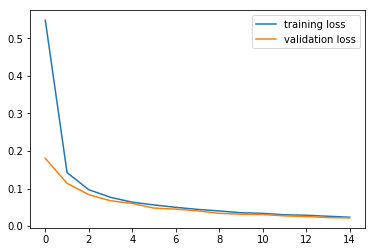

In [0]:
plt.plot(running_loss_history, label = 'training loss')
plt.plot(val_running_loss_history, label= 'validation loss')
plt.legend()

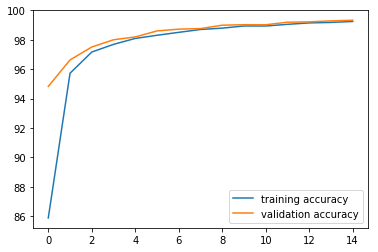

In [0]:
plt.plot(running_corrects_history ,label ='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()

In [0]:
import PIL.ImageOps

<Response [200]>


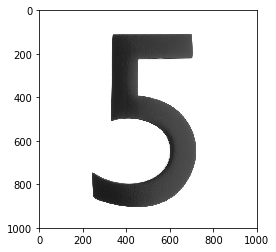

In [0]:
import requests
from PIL import Image
url ='https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
response = requests.get(url,stream = True)
img = Image.open(response.raw)
plt.imshow(img)
print(response)

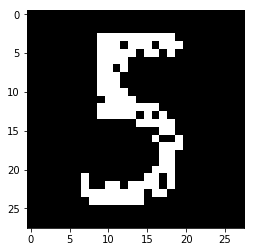

In [0]:
# the model is trained on black background and white image
# above image is reverse ..converting above image to desired form

img = PIL.ImageOps.invert(img)
img = img.convert('1')
img =transform(img)
plt.imshow(im_convert(img))

In [0]:
images = img.to(device)

images =images[0].unsqueeze(0).unsqueeze(0)
#return is a new tensor with a dimension of size 1 inserted at the specified position zero and it does
#that twice and that is how we will account for the extra dimensionality 

output = model(images)
_,pred = torch.max(output, 1)
print(pred.item())

5


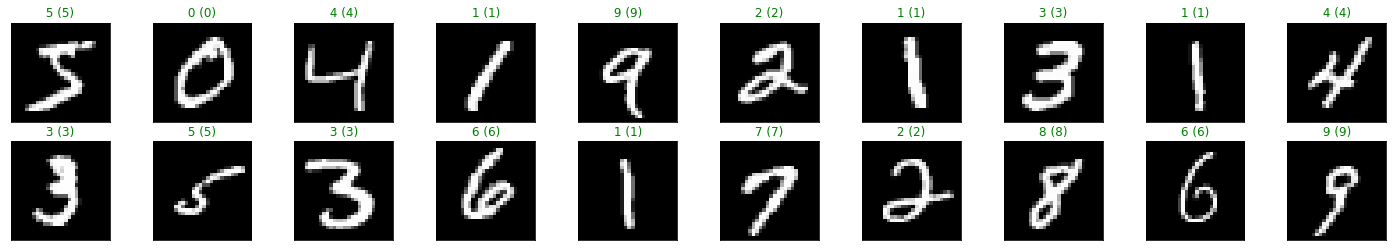

In [0]:
# creating a iterator 
# iter creates an object that allows us to go through the iterable of training loader one element at a time 
dataiter = iter(validation_loader)
images , labels = dataiter.next()
images = images.to(device)
labels = labels.to(device)



output = model(images)
_,preds = torch.max(output, 1)


fig = plt.figure(figsize =(25,4))

for idx in np.arange(20):
  ax =fig.add_subplot(2,10,idx+1,xticks =[],yticks =[])   # 2 rows 10 columns per row and index
  plt.imshow(im_convert(images[idx]))
  ax.set_title(" {} ({}) ".format(str(preds[idx].item()),str(labels[idx].item())), color= "green" if preds[idx]==labels[idx] else "red")

In [0]:
# saving model

torch.save(model.state_dict(), 'mnist_cnn.pth')

In [0]:
# convert pytorch model to tensorflow model using OONX

# STEP 1 - export trained model to oonx

from torch.autograd import Variable

# Load the trained model from file
trained_model = LeNet()
trained_model.load_state_dict(torch.load('mnist_cnn.pth'))

# Export the trained model to ONNX
dummy_input = Variable(torch.randn(1, 1, 28, 28)) # one black and white 28 x 28 picture will be the input to the model
torch.onnx.export(trained_model, dummy_input, "mnist_cnn.onnx")


In [0]:
!pip3 install onnx
!pip3 install onnx-tf

     |████████████████████████████████| 7.1MB 2.8MB/s 
     |████████████████████████████████| 122kB 2.7MB/s 


In [0]:
import onnx
from onnx_tf.backend import prepare

# Load the ONNX file
model = onnx.load('mnist_cnn.onnx')

# Import the ONNX model to Tensorflow
tf_rep = prepare(model)

/usr/local/lib/python3.6/dist-packages/onnx_tf/common/__init__.py:87: UserWarning: onnx_tf.common.get_outputs_names is deprecated. It will be removed in future release. Use TensorflowGraph.get_outputs_names instead.
  warnings.warn(message)
W0710 04:04:52.926102 140329068513152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/onnx_tf/handlers/backend/ceil.py:10: The name tf.ceil is deprecated. Please use tf.math.ceil instead.

W0710 04:04:52.930576 140329068513152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/onnx_tf/handlers/backend/depth_to_space.py:12: The name tf.depth_to_space is deprecated. Please use tf.compat.v1.depth_to_space instead.

W0710 04:04:52.934353 140329068513152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/onnx_tf/handlers/backend/erf.py:9: The name tf.erf is deprecated. Please use tf.math.erf instead.

W0710 04:04:55.335278 140329068513152 lazy_loader.py:50] 
The TensorFlow contrib module w

In [0]:
# Input nodes to the model
print('inputs:', tf_rep.inputs)

# Output nodes from the model
print('outputs:', tf_rep.outputs)

# All nodes in the model
print('tensor_dict:')
print(tf_rep.tensor_dict)

inputs: ['0']
outputs: ['19']
tensor_dict:
{'conv1.bias': <tf.Tensor 'Const:0' shape=(20,) dtype=float32>, 'conv1.weight': <tf.Tensor 'Const_1:0' shape=(20, 1, 5, 5) dtype=float32>, 'conv2.bias': <tf.Tensor 'Const_2:0' shape=(50,) dtype=float32>, 'conv2.weight': <tf.Tensor 'Const_3:0' shape=(50, 20, 5, 5) dtype=float32>, 'fc1.bias': <tf.Tensor 'Const_4:0' shape=(500,) dtype=float32>, 'fc1.weight': <tf.Tensor 'Const_5:0' shape=(500, 800) dtype=float32>, 'fc2.bias': <tf.Tensor 'Const_6:0' shape=(10,) dtype=float32>, 'fc2.weight': <tf.Tensor 'Const_7:0' shape=(10, 500) dtype=float32>, '0': <tf.Tensor '0:0' shape=(1, 1, 28, 28) dtype=float32>, '9': <tf.Tensor 'Add:0' shape=(1, 20, 24, 24) dtype=float32>, '10': <tf.Tensor 'Relu:0' shape=(1, 20, 24, 24) dtype=float32>, '11': <tf.Tensor 'max_pool:0' shape=(1, 20, 12, 12) dtype=float32>, '12': <tf.Tensor 'Add_1:0' shape=(1, 50, 8, 8) dtype=float32>, '13': <tf.Tensor 'Relu_1:0' shape=(1, 50, 8, 8) dtype=float32>, '14': <tf.Tensor 'max_pool_1:0'

In [0]:
tf_rep.export_graph('mnist_cnn.pb')

In [0]:
from tensorflow.python.tools import freeze_graph, optimize_for_inference_lib

In [0]:
import tensorflow as tf

# Input Graph Definition
input_graph_def = tf.GraphDef()

In [0]:
# Optimize Frozen Model for Inference
# Open "frozen_linear_regression.pb" model
with tf.gfile.Open('mnist_cnn.pb', 'rb') as f:
    # Read data from frozen model file
    data = f.read()
    # Parse model data from "data"
    input_graph_def.ParseFromString(data)

In [0]:
output_graph_def = optimize_for_inference_lib.optimize_for_inference(input_graph_def=input_graph_def,
                                                                     input_node_names=["0"],
                                                                     output_node_names=['Add'],
                                                                     placeholder_type_enum=tf.float32.as_datatype_enum)

In [0]:
file = tf.gfile.FastGFile(name="optimized_mnist_cnn_model.pb",
                          mode='w')

In [49]:
# Save the optimized graph def as an optimized frozen model
file.write(file_content=output_graph_def.SerializeToString())

print("Optimized Model Saved at ./optimized_mnist_cnn_model.pb")

Optimized Model Saved at ./optimized_mnist_cnn_model.pb


In [0]:
# Convert Frozen Model to TFLite Model
converter = tf.lite.TFLiteConverter.from_frozen_graph(graph_def_file="mnist_cnn.pb",
                                                      input_arrays=["0"],
                                                      output_arrays=['Add'],
                                                      )

In [51]:
# Quantize Trained Model
converter.post_training_quantize = True

# Convert Frozen Model to TFLite Model
tflite_model = converter.convert()

# Save TFLite Model
open("optimized_mnist_cnn_model.tflite", "wb").write(tflite_model)

print("Optimized TFLite Model Saved at optimized_mnist_cnn_model.tflite")

/usr/local/lib/python3.6/dist-packages/tensorflow/lite/python/lite.py:769: UserWarning: Property post_training_quantize is deprecated, please use optimizations=[Optimize.DEFAULT] instead.
  " instead." % name)


ConverterError: ignored